## Heart Disease Prediction

### Introduction

In this project we will explore the heart disease dataset using exploratory data analysis (EDA) and work on classification algorithms for model builiding (disease prediction). The key features are: agre, sex, chest pain (cp), resting blood pressure (trestbps), cholesterol (chol), fasting blood sugar (fbs), resting electrocardiographic result (restecg), maximum heart rate achieved (thalach), exercise induced angina (exang), ST drpression induced by excercise relative to rest (oldpeak), the slop of the peak exercise ST segment (slop), number of major vessels (0-3)colored by flouroscopy (ca), thalassemia (thal), target (the lable): 0 = no disease; 1 = disease. 

### 1. Loading libraries

In [48]:
library(tidyverse) 

### 2. Load the data

In [49]:
data <- read.csv('Heart.csv')
head(data)

ï..age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
57,1,0,140,192,0,1,148,0,0.4,1,0,1,1


### 3. Exploratory data analysis (EDA)

In [50]:
tail(data)

,ï..age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
299,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
300,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
301,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
302,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
303,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [51]:
glimpse(data)

Observations: 303
Variables: 14
$ ï..age   <int> 63, 37, 41, 56, 57, 57, 56, 44, 52, 57, 54, 48, 49, 64, 58...
$ sex      <int> 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0...
$ cp       <int> 3, 2, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 3, 3, 2, 2, 3, 0, 3...
$ trestbps <int> 145, 130, 130, 120, 120, 140, 140, 120, 172, 150, 140, 130...
$ chol     <int> 233, 250, 204, 236, 354, 192, 294, 263, 199, 168, 239, 275...
$ fbs      <int> 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0...
$ restecg  <int> 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1...
$ thalach  <int> 150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139...
$ exang    <int> 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0...
$ oldpeak  <dbl> 2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0.0, 0.5, 1.6, 1.2, 0.2...
$ slope    <int> 0, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 0, 2, 2...
$ ca       <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2...
$ thal     <int> 1, 

In [52]:
ncol(data)
nrow(data)

[1] 14

[1] 303

In [53]:
colnames(data)

[1] "ï..age"   "sex"      "cp"       "trestbps" "chol"     "fbs"     
 [7] "restecg"  "thalach"  "exang"    "oldpeak"  "slope"    "ca"      
[13] "thal"     "target"

In [54]:
summary(data)

     ï..age           sex               cp           trestbps    
 Min.   :29.00   Min.   :0.0000   Min.   :0.000   Min.   : 94.0  
 1st Qu.:47.50   1st Qu.:0.0000   1st Qu.:0.000   1st Qu.:120.0  
 Median :55.00   Median :1.0000   Median :1.000   Median :130.0  
 Mean   :54.37   Mean   :0.6832   Mean   :0.967   Mean   :131.6  
 3rd Qu.:61.00   3rd Qu.:1.0000   3rd Qu.:2.000   3rd Qu.:140.0  
 Max.   :77.00   Max.   :1.0000   Max.   :3.000   Max.   :200.0  
      chol            fbs            restecg          thalach     
 Min.   :126.0   Min.   :0.0000   Min.   :0.0000   Min.   : 71.0  
 1st Qu.:211.0   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:133.5  
 Median :240.0   Median :0.0000   Median :1.0000   Median :153.0  
 Mean   :246.3   Mean   :0.1485   Mean   :0.5281   Mean   :149.6  
 3rd Qu.:274.5   3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:166.0  
 Max.   :564.0   Max.   :1.0000   Max.   :2.0000   Max.   :202.0  
     exang           oldpeak         slope             ca        
 Mi

##### Check for the null values 

In [64]:
s = sum(is.na(data))
s

[1] 0

In [65]:
is.null(data)

[1] FALSE

##### Data Transformation

In [55]:
data2 <- data %>%
    mutate(sex = if_else(sex == 1, 'MALE', 'FEMALE'),
          fbs = if_else(fbs == 1, ">120", "<=120"),
          exang = if_else(exang == 1, "YES", "NO"),
          cp = if_else(cp == 1, 'ATYPICAL ANHINA',
                       if_else(cp == 2, "NON-ANGINAL PAIN", "ASYMPTOMATIC")),
          restecg = if_else(restecg == 0, "NORMAL",
                            if_else(restecg == 1, "ABNORMALITY", "PROBABLE OR DEFINITE")),
          slope = as.factor(slope),
          ca = as.factor(ca),
          thal = as.factor(thal),
          target = if_else(target == 1, "YES", "NO")
          ) %>%
          mutate_if(is.character, as.factor) %>%
          dplyr::select(target, sex, fbs, exang, cp, restecg, slope, ca, thal, everything())

##### Data visualization

In [56]:
library(repr) # to alter the size of the plot

options(repr.plot.width = 4, repr.plot.height = 2)

##### Target variable distribution

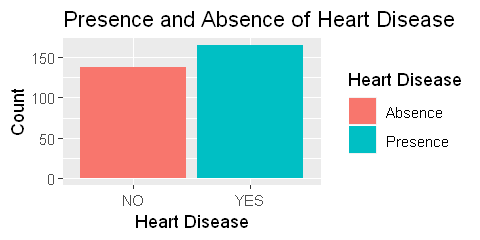

In [57]:
# Bar plot for target (heart diasease)

ggplot(data2, aes(x=data2$target, fill=data2$target)) + 
    geom_bar()+
    xlab('Heart Disease')+
    ylab('Count')+
    ggtitle('Presence and Absence of Heart Disease')+
    scale_fill_discrete(name = "Heart Disease", labels = c('Absence', 'Presence'))

In [58]:
prop.table(table(data2$target))


       NO       YES 
0.4554455 0.5445545 

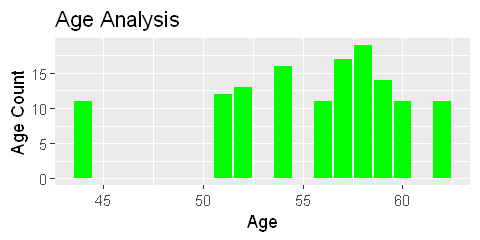

In [59]:
# count the frequency of the values of age

data2 %>%
    group_by(ï..age) %>%
    count() %>%
    filter(n>10) %>%
    ggplot()+
    geom_col(aes(ï..age, n), fill = 'green')+
    ggtitle('Age Analysis')+
    xlab('Age')+
    ylab('Age Count')

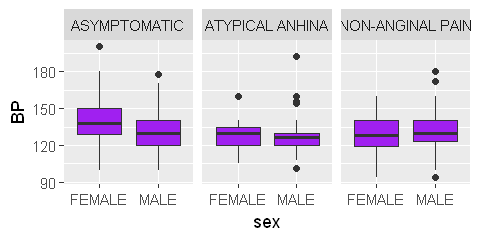

In [60]:
# compare blood pressure the chest pain

    data2 %>%
      ggplot(aes(x=sex, y=trestbps))+
      geom_boxplot(fill = 'purple')+
      xlab('sex')+
      ylab('BP')+
      facet_grid(~cp)

##### Correlation

In [61]:
install.packages('corrplot')
install.packages('ggplot2')


  There is a binary version available but the source version is later:
         binary source needs_compilation
corrplot   0.88   0.92             FALSE



installing the source package 'corrplot'

also installing the dependency 'rlang'




  There are binary versions available but the source versions are later:
        binary source needs_compilation
rlang   0.4.11  1.0.2              TRUE
ggplot2  3.3.3  3.3.6             FALSE

  Binaries will be installed
package 'rlang' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rlang'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\sachin\ANACONDA\envs\R\Lib\R\library\00LOCK\rlang\libs\x64\rlang.dll to C:\Users\sachin\ANACONDA\envs\R\Lib\R\library\rlang\libs\x64\rlang.dll: Permission denied"Warning message:
"restored 'rlang'"


The downloaded binary packages are in
	C:\Users\sachin\AppData\Local\Temp\Rtmpsrj5vx\downloaded_packages


installing the source package 'ggplot2'

Warning message in install.packages("ggplot2"):
"installation of package 'ggplot2' had non-zero exit status"

In [62]:
library(corrplot)
library(ggplot2)

,ï..age,trestbps,chol,thalach,oldpeak
ï..age,1.0000000,0.27935091,0.213677957,-0.398521938,0.21001257
trestbps,0.2793509,1.00000000,0.123174207,-0.046697728,0.19321647
chol,0.2136780,0.12317421,1.000000000,-0.009939839,0.05395192
thalach,-0.3985219,-0.04669773,-0.009939839,1.000000000,-0.34418695
oldpeak,0.2100126,0.19321647,0.053951920,-0.344186948,1.00000000


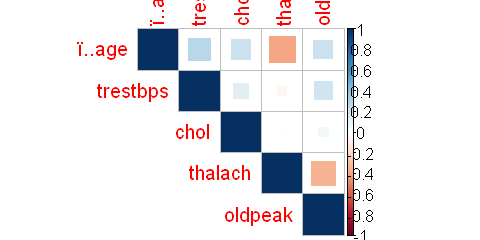

In [63]:
cor_heart <- cor(data2[, 10:14])
cor_heart

corrplot(cor_heart, method = 'square', type='upper')

##### Training and testing the data

In [66]:
library(caret) # for training and testing
set.seed(10)

Loading required package: lattice

Attaching package: 'caret'

The following object is masked from 'package:purrr':

    lift



In [67]:
colnames(data2)

[1] "target"   "sex"      "fbs"      "exang"    "cp"       "restecg" 
 [7] "slope"    "ca"       "thal"     "ï..age"   "trestbps" "chol"    
[13] "thalach"  "oldpeak"

##### Split the dataset. Training-70, testing-30 

In [70]:
inTrainRows <- createDataPartition(data2$target,p=0.7,list=FALSE)
trainData <- data2[inTrainRows,]
testData <- data2[-inTrainRows,]

##### Lets check the percent of train data

In [71]:
nrow(trainData)/(nrow(testData)+nrow(trainData))

[1] 0.7029703

##### Creat list to store results

In [72]:
AUC = list() # area under curve
Accuracy = list()

### 4. Model building

#####  Logistic Regression

In [75]:
install.packages('e1071', dependencies=TRUE) #intalled e1071 as it was giving error

set.seed(10)
logRegModel <- train(target ~ .,
                     data=trainData,
                     method = 'glm',
                     family = 'binomial')
logRegPrediction <- predict(logRegModel, testData)
logRegPredictionprob <- predict(logRegModel, testData, type = 'prob')[2]
logRegConfMat <- confusionMatrix(logRegPrediction, testData[,'target'])

also installing the dependencies 'proxy', 'mlbench', 'SparseM', 'slam'




  There are binary versions available but the source versions are later:
      binary source needs_compilation
proxy 0.4-25 0.4-26              TRUE
slam  0.1-48 0.1-50              TRUE
e1071  1.7-6  1.7-9              TRUE

  Binaries will be installed
package 'proxy' successfully unpacked and MD5 sums checked
package 'mlbench' successfully unpacked and MD5 sums checked
package 'SparseM' successfully unpacked and MD5 sums checked
package 'slam' successfully unpacked and MD5 sums checked
package 'e1071' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\sachin\AppData\Local\Temp\Rtmpsrj5vx\downloaded_packages


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading

In [78]:
# ROC curve
install.packages('pROC')
library(pROC)
AUC$logReg <- roc(as.numeric(testData$target),as.numeric(as.matrix((logRegPredictionprob))))$auc
Accuracy$logReg <- logRegConfMat$overall['Accuracy']


  There is a binary version available but the source version is later:
       binary source needs_compilation
pROC 1.17.0.1 1.18.0              TRUE

  Binaries will be installed


Warning message:
"package 'pROC' is in use and will not be installed"Setting levels: control = 1, case = 2
Setting direction: controls < cases


##### Support Vector Machine

In [81]:
fitControl <- trainControl(method = 'repeatedcv',
                          number = 10,
                          repeats =10,
                          classProbs = TRUE,
                          summaryFunction = twoClassSummary)

In [86]:
install.packages('kernlab')

set.seed(10)
svmModel <- train(target ~ . , data=trainData,
                     method = 'svmRadial',
                     trControl = fitControl,
                     prepProcess = c('center', 'scale'),
                     tuneLength = 8,
                     metric = 'ROC')
svmPrediction <- predict(svmModel, testData)
svmPredictionprob <- predict(svmModel, testData, type = 'prob')[2]
svmConfMat <- confusionMatrix(svmPrediction, testData[,'target'])

# ROC curve
AUC$svm <- roc(as.numeric(testData$target),as.numeric(as.matrix((svmPredictionprob))))$auc
Accuracy$svm <- svmConfMat$overall['Accuracy']


  There is a binary version available but the source version is later:
        binary source needs_compilation
kernlab 0.9-29 0.9-30              TRUE

  Binaries will be installed
package 'kernlab' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'kernlab'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\sachin\ANACONDA\envs\R\Lib\R\library\00LOCK\kernlab\libs\x64\kernlab.dll to C:\Users\sachin\ANACONDA\envs\R\Lib\R\library\kernlab\libs\x64\kernlab.dll: Permission denied"Warning message:
"restored 'kernlab'"


The downloaded binary packages are in
	C:\Users\sachin\AppData\Local\Temp\Rtmpsrj5vx\downloaded_packages


Setting levels: control = 1, case = 2
Setting direction: controls < cases


##### Random Forest 

In [87]:
library(randomForest)
set.seed(10)
RFModel <- randomForest(target ~ .,
                     data=trainData,
                     importance=TRUE,
                     ntree=200)

# varImpPlot(RFModel)
RFPrediction <- predict(RFModel, testData)
RFPredictionprob = predict(RFModel,testData,type='prob')[,2]

RFConfMat <- confusionMatrix(RFPrediction, testData[,'target'])

AUC$RF <- roc(as.numeric(testData$target), as.numeric(as.numeric(as.matrix(RFPredictionprob))))$auc
Accuracy$RF <- RFConfMat$overall['Accuracy']


randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:dplyr':

    combine

The following object is masked from 'package:ggplot2':

    margin

Setting levels: control = 1, case = 2
Setting direction: controls < cases


##### Comparison of AUC and Accuracy between models

In [88]:
row.names <- names(Accuracy)
col.names <- c('AUC', 'Accuracy')
cbind(as.data.frame(matrix(c(AUC, Accuracy), nrow = 3, ncol = 2,
                          dimnames = list(row.names, col.names))))

,AUC,Accuracy
logReg,0.8476854,0.7777778
svm,0.800896,0.7333333
RF,0.8427078,0.7555556


In [90]:
summary(logRegModel)$coeff

ERROR: Error in summary(logRegModel)$coeff: $ operator is invalid for atomic vectors


##### Confusion Matrix

In [92]:
logRegConfMat

Confusion Matrix and Statistics

          Reference
Prediction NO YES
       NO  32  11
       YES  9  38
                                          
               Accuracy : 0.7778          
                 95% CI : (0.6779, 0.8587)
    No Information Rate : 0.5444          
    P-Value [Acc > NIR] : 3.689e-06       
                                          
                  Kappa : 0.5538          
                                          
 Mcnemar's Test P-Value : 0.8231          
                                          
            Sensitivity : 0.7805          
            Specificity : 0.7755          
         Pos Pred Value : 0.7442          
         Neg Pred Value : 0.8085          
             Prevalence : 0.4556          
         Detection Rate : 0.3556          
   Detection Prevalence : 0.4778          
      Balanced Accuracy : 0.7780          
                                          
       'Positive' Class : NO              
                                 

In [93]:
RFConfMat

Confusion Matrix and Statistics

          Reference
Prediction NO YES
       NO  31  12
       YES 10  37
                                        
               Accuracy : 0.7556        
                 95% CI : (0.6536, 0.84)
    No Information Rate : 0.5444        
    P-Value [Acc > NIR] : 2.879e-05     
                                        
                  Kappa : 0.5092        
                                        
 Mcnemar's Test P-Value : 0.8312        
                                        
            Sensitivity : 0.7561        
            Specificity : 0.7551        
         Pos Pred Value : 0.7209        
         Neg Pred Value : 0.7872        
             Prevalence : 0.4556        
         Detection Rate : 0.3444        
   Detection Prevalence : 0.4778        
      Balanced Accuracy : 0.7556        
                                        
       'Positive' Class : NO            
                                        

In [94]:
svmConfMat

Confusion Matrix and Statistics

          Reference
Prediction NO YES
       NO  30  13
       YES 11  36
                                          
               Accuracy : 0.7333          
                 95% CI : (0.6297, 0.8211)
    No Information Rate : 0.5444          
    P-Value [Acc > NIR] : 0.0001788       
                                          
                  Kappa : 0.4646          
                                          
 Mcnemar's Test P-Value : 0.8382565       
                                          
            Sensitivity : 0.7317          
            Specificity : 0.7347          
         Pos Pred Value : 0.6977          
         Neg Pred Value : 0.7660          
             Prevalence : 0.4556          
         Detection Rate : 0.3333          
   Detection Prevalence : 0.4778          
      Balanced Accuracy : 0.7332          
                                          
       'Positive' Class : NO              
                                 

### 5. Concluding Remarks

We explored the heart disease dataset and practice binary classification (modelling). Our results suggest that the best model for heart disease prediction is logistic regression with highest accuracy.